#### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap
import seaborn as sns

%matplotlib inline
import io
pd.set_option('display.max_columns', None)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#import streamlit as st
import cufflinks as cf
cf.set_config_file(theme='pearl',sharing='public',offline=True)

#### **Check encoding file**

In [2]:
import chardet
with open("D:\Descargas\Stats19-Data1979-2004\Accidents7904.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

print(result)

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


#### **Import Data**

In [3]:
accidents=pd.read_csv('D:\Descargas\Stats19-Data1979-2004\Accidents7904.csv',delimiter=',',encoding='UTF-8-SIG',low_memory=False)

In [4]:
accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [5]:
accidents.sample(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
3405536,199243U107102,460500.0,189480.0,NaN,NaN,43,3,2,1,03/10/1992,7,12:35,484,9999,3,4130,6,30,8,4,6,0,0,0,1,2,2,0,0,-1,-1,NaN
5372550,200101QA00656,516260.0,191610.0,-0.322371,51.611275,1,2,2,1,14/09/2001,6,17:45,29,E09000015,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,E01002228
11313,197901D3OJD15,252170.0,795000.0,NaN,NaN,1,3,1,1,03/04/1979,3,14:45,11,9999,3,3218,9,30,0,-1,-1,0,-1,-1,1,8,1,-1,0,-1,-1,NaN
2732967,198995589C034,319160.0,671810.0,NaN,NaN,95,3,2,1,15/05/1989,2,11:00,824,9999,6,0,1,30,1,4,6,0,0,0,1,1,1,0,0,-1,-1,NaN
4783835,199834NN01252,475180.0,260610.0,NaN,NaN,34,3,1,1,27/09/1998,1,00:05,384,E10000021,6,7182,6,30,3,4,6,7187,0,0,7,1,1,0,0,1,-1,NaN


In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224198 entries, 0 to 6224197
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [7]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,6214182.0,429996.434789,109864.543100,0.000000,366900.000000,435470.000000,520130.000000,9.999800e+05
Location_Northing_OSGR,6214182.0,303085.137312,171718.034237,0.000000,177860.000000,266570.000000,399170.000000,1.213700e+06
Longitude,1337067.0,-1.451627,1.388414,-7.536169,-2.365944,-1.434708,-0.227007,1.760591e+00
Latitude,1337067.0,52.586105,1.428390,49.912761,51.498603,52.332713,53.470917,6.080166e+01
Police_Force,6224198.0,29.948737,26.616900,1.000000,6.000000,23.000000,45.000000,9.800000e+01
Accident_Severity,6224198.0,2.771100,0.459411,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,6224198.0,1.764399,0.732189,1.000000,1.000000,2.000000,2.000000,1.920000e+02
Number_of_Casualties,6224198.0,1.327832,0.826645,1.000000,1.000000,1.000000,1.000000,9.000000e+01
Day_of_Week,6224198.0,4.166296,1.950466,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),6224198.0,340.067290,255.696460,1.000000,102.000000,307.000000,518.000000,9.410000e+02


#### **Cleaning and Process the data**

##### **Checking percentage of missing or NaN values**

In [8]:
print("NaN data: \n \n"," \n ",accidents.isna().sum()/len(accidents),"%")
print("\n Missing or out of range data:\n",np.abs(accidents[accidents==-1].sum())/len(accidents),"%")
#accidents.isna().sum().sum()/len(accidents)

NaN data: 
 
  
  Accident_Index                                 0.000000
Location_Easting_OSGR                          0.001609
Location_Northing_OSGR                         0.001609
Longitude                                      0.785182
Latitude                                       0.785182
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Date                                           0.000001
Day_of_Week                                    0.000000
Time                                           0.000111
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0.000000
Speed_limit                   

##### **Drop the useless columns**

In [9]:
columns_to_drop = ['Location_Easting_OSGR', 'Location_Northing_OSGR',
                    'Police_Force','Local_Authority_(District)',
                    'Local_Authority_(Highway)','1st_Road_Number', 
                    '2nd_Road_Number','Pedestrian_Crossing-Human_Control', 
                    'Pedestrian_Crossing-Physical_Facilities',
                    'Did_Police_Officer_Attend_Scene_of_Accident',
                    'LSOA_of_Accident_Location','Longitude','Latitude',
                    'Urban_or_Rural_Area','Junction_Control','2nd_Road_Class',
                    'Special_Conditions_at_Site','Carriageway_Hazards',
                    'Junction_Detail']

In [10]:
accidents.drop(labels=columns_to_drop,inplace=True,axis=1)

##### **Clean NaN values**

In [11]:
accidents.dropna(inplace=True)

##### **Clean missing values = - 1**

In [12]:
#cleaning the missing values = -1
for i,k in enumerate(accidents):
    accidents.drop(index=accidents[accidents[k] == -1].index, inplace=True)

In [13]:
accidents.shape

(6023053, 13)

#### **Process the data**

In [14]:
accidents['Date']=pd.to_datetime(accidents['Date'])
accidents['Month']=accidents['Date'].dt.month
accidents['Year']=accidents['Date'].dt.year
accidents['Hour'] = pd.to_datetime(accidents['Time'], format='%H:%M').dt.hour

In [15]:
accidents.drop(['Time'],axis=1,inplace=True)

In [16]:
'''accidents['Hour']=  accidents['Time'].str[0:2]
accidents['Hour'] = pd.to_numeric(accidents['Hour'])
accidents = accidents.dropna(subset=['Hour'])
accidents['Hour'] = accidents['Hour'].astype('int')'''

"accidents['Hour']=  accidents['Time'].str[0:2]\naccidents['Hour'] = pd.to_numeric(accidents['Hour'])\naccidents = accidents.dropna(subset=['Hour'])\naccidents['Hour'] = accidents['Hour'].astype('int')"

In [17]:
def daytime(hour):
    if hour >= 5 and hour < 10:
        return "Commuting to work"
    elif hour >= 10 and hour < 15:
        return "Office hours"
    elif hour >= 15 and hour < 19:
        return "Commuting to home"
    elif hour >= 19 and hour < 23:
        return "Evening"
    else:
        return "Night"
accidents['Daytime'] = accidents['Hour'].apply(daytime)


In [18]:
accidents['Daytime'].value_counts()

Commuting to home    1869429
Office hours         1630133
Commuting to work    1015355
Evening               986678
Night                 521458
Name: Daytime, dtype: int64

In [19]:
accidents['Road_Surface_Conditions'].value_counts()

1    3855973
2    1990037
4     125038
3      43506
5       8499
Name: Road_Surface_Conditions, dtype: int64

In [20]:
accidents.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Month,Year,Hour,Daytime
0,197901A11AD14,3,2,1,1979-01-18,5,3,1,30,1,8,1,1,1979,8,Commuting to work
1,197901A1BAW34,3,1,1,1979-01-01,2,6,9,30,4,8,3,1,1979,1,Night
2,197901A1BFD77,3,2,3,1979-01-01,2,3,9,30,4,8,3,1,1979,1,Night
4,197901A1BGF95,2,2,1,1979-01-01,2,3,6,30,4,3,3,1,1979,1,Night
5,197901A1CBC96,3,1,1,1979-01-01,2,3,6,30,4,8,3,1,1979,2,Night


In [21]:
accidents.Light_Conditions = accidents.Light_Conditions.replace([1,4,5,6,7], 
                                                      ['Daylight', 
                                                       'Darkness - lights lit', 
                                                       'Darkness - lights unlit', 
                                                       'Darkness - no lighting', 
                                                       'Darkness - lighting unknown'])
accidents.Weather_Conditions = accidents.Weather_Conditions.replace([1,2,3,4,5,6,7,8,9], 
                                                                ['Fine no high winds', 
                                                                 'Raining no high winds', 
                                                                 'Snowing no high winds', 
                                                                 'Fine + high winds', 
                                                                 'Raining + high winds', 
                                                                 'Snowing + high winds', 
                                                                 'Fog or mist', 'Other', 'Unknown', 
                                                                 ])


accidents.Road_Surface_Conditions = accidents.Road_Surface_Conditions.replace([1,2,3,4,5,6,7], 
                                                                                    ['Dry', 
                                                                                     'Wet or damp', 
                                                                                     'Snow', 
                                                                                     'Frost or ice', 
                                                                                     'Flood over 3cm. deep',
                                                                                     'Oil or diesel',
                                                                                     'Mud'])

def road_conditions(cond):
    if cond != "Dry":
        return 'Bad'
    elif cond == 'Dry':
        return 'Good'
accidents['Road_Surface_Conditions_2'] = accidents['Road_Surface_Conditions'].apply(road_conditions)

def weather_conditions(value1):
    if value1 == 'Fine no high winds':
        return 'Good'
    else:
        return 'Bad'
accidents['Weather_Conditions_2'] =  accidents.Weather_Conditions.apply(weather_conditions)


def light_conditions(value2):
    if value2 == 'Daylight':
        return 'Good'
    else:
        return 'Bad'
accidents['Light_Conditions_2'] = accidents['Light_Conditions'].apply(light_conditions)

In [22]:
def speed_groups(speed):
    if speed < 10:
        return "0-10"
    elif speed >=10 and speed < 20:
        return "10-20"
    elif speed >=20 and speed < 30:
        return "20-30"
    elif speed >=30 and speed < 40:
        return "30-40"
    elif speed >=40 and speed < 50:
        return "40-50"
    elif speed >=50 and speed < 60:
        return "50-60"
    elif speed >=60 and speed < 70:
        return "60-70"
    elif speed >=70 and speed < 80:
        return "70-80"
    elif speed >=80 and speed < 90:
        return "80-90"
    
accidents['Speed_limit_2'] =  accidents['Speed_limit'].apply(speed_groups)

In [23]:
accidents.drop(['Light_Conditions','Weather_Conditions','Road_Surface_Conditions'],inplace=True,axis=1)

In [24]:
accidents['Accident_Severity'].replace([1,2,3],['Fatal','Serious','Slight'],inplace=True)


accidents['Accident_Severity'].value_counts(normalize=True)

Slight     0.786649
Serious    0.195782
Fatal      0.017568
Name: Accident_Severity, dtype: float64

In [25]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accidents['Day_of_Week'].replace([1,2,3,4,5,6,7],days, inplace=True)
accidents.Day_of_Week.value_counts(normalize=True).sort_values(ascending=True)


Sunday       0.112166
Monday       0.140341
Tuesday      0.140834
Wednesday    0.143082
Saturday     0.143674
Thursday     0.150016
Friday       0.169888
Name: Day_of_Week, dtype: float64

In [26]:
#Put Motorway and A(M) in the same category
accidents['1st_Road_Class'].replace([1,2,3,4,5,6],['Motorway','A(M)','A', 'B', 'C', 'Unclassified'],inplace=True)

accidents['1st_Road_Class'] = accidents['1st_Road_Class'].replace('A(M)', 'Motorway')
accidents['1st_Road_Class'].value_counts(normalize=True)

A               0.470594
Unclassified    0.289344
B               0.126654
C               0.085809
Motorway        0.027599
Name: 1st_Road_Class, dtype: float64

In [27]:
accidents['Road_Type'].replace([1,2,3,6,7,9,12],['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Unknown','One way street/Slip road'],inplace=True)
accidents.Road_Type.value_counts(normalize=True)

Single carriageway    0.797725
Dual carriageway      0.133733
Roundabout            0.049082
Unknown               0.019461
Name: Road_Type, dtype: float64

In [28]:
'''accidents.Light_Conditions = accidents.Light_Conditions.replace([1,4,5,6,7], 
                                                      ['Daylight', 
                                                       'Darkness - lights lit', 
                                                       'Darkness - lights unlit', 
                                                       'Darkness - no lighting', 
                                                       'Darkness - lighting unknown'])


accidents.Light_Conditions.value_counts(normalize=True).plot(kind='bar',color='gold');'''



'''accidents.Weather_Conditions = accidents.Weather_Conditions.replace([1,2,3,4,5,6,7,8,9], 
                                                                ['Fine no high winds', 
                                                                 'Raining no high winds', 
                                                                 'Snowing no high winds', 
                                                                 'Fine + high winds', 
                                                                 'Raining + high winds', 
                                                                 'Snowing + high winds', 
                                                                 'Fog or mist', 'Other', 'Unknown', 
                                                                 ])
accidents.Weather_Conditions.value_counts(normalize=True).plot(kind='bar',color='gold');'''

'''accidents.Road_Surface_Conditions = accidents.Road_Surface_Conditions.replace([1,2,3,4,5,6,7], 
                                                                                    ['Dry', 
                                                                                     'Wet or damp', 
                                                                                     'Snow', 
                                                                                     'Frost or ice', 
                                                                                     'Flood over 3cm. deep',
                                                                                     'Oil or diesel',
                                                                                     'Mud'])
accidents.Road_Surface_Conditions.value_counts(normalize=True).plot(kind='bar',color='gold');'''

"accidents.Road_Surface_Conditions = accidents.Road_Surface_Conditions.replace([1,2,3,4,5,6,7], \n                                                                                    ['Dry', \n                                                                                     'Wet or damp', \n                                                                                     'Snow', \n                                                                                     'Frost or ice', \n                                                                                     'Flood over 3cm. deep',\n                                                                                     'Oil or diesel',\n                                                                                     'Mud'])\naccidents.Road_Surface_Conditions.value_counts(normalize=True).plot(kind='bar',color='gold');"

In [29]:
accidents.dtypes

Accident_Index                       object
Accident_Severity                    object
Number_of_Vehicles                    int64
Number_of_Casualties                  int64
Date                         datetime64[ns]
Day_of_Week                          object
1st_Road_Class                       object
Road_Type                            object
Speed_limit                           int64
Month                                 int64
Year                                  int64
Hour                                  int64
Daytime                              object
Road_Surface_Conditions_2            object
Weather_Conditions_2                 object
Light_Conditions_2                   object
Speed_limit_2                        object
dtype: object

In [30]:
accidents['Month'] = accidents['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January', 'February', 
                                                 'March','April', 'May','June',
                                                 'July', 'August', 'September',
                                                'October','November','December'
])

accidents['Year'] = accidents['Year'].astype(int)

In [31]:
accidents['Weather_Conditions_2'].value_counts(normalize=True)

Good    0.759659
Bad     0.240341
Name: Weather_Conditions_2, dtype: float64

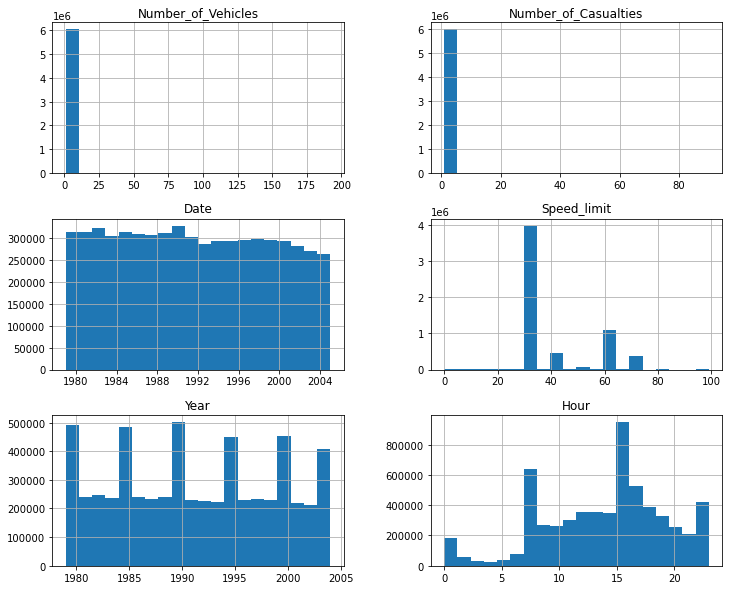

In [32]:
accidents.hist(figsize=(12,10),bins=20);

<Figure size 432x288 with 0 Axes>

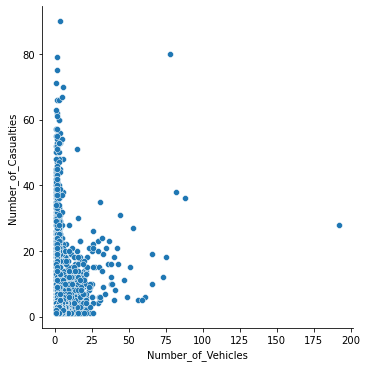

In [33]:
import random
fig = plt.figure()

sns.relplot(data=accidents,x='Number_of_Vehicles',y='Number_of_Casualties') 

In [34]:
accidents.dtypes

Accident_Index                       object
Accident_Severity                    object
Number_of_Vehicles                    int64
Number_of_Casualties                  int64
Date                         datetime64[ns]
Day_of_Week                          object
1st_Road_Class                       object
Road_Type                            object
Speed_limit                           int64
Month                                object
Year                                  int32
Hour                                  int64
Daytime                              object
Road_Surface_Conditions_2            object
Weather_Conditions_2                 object
Light_Conditions_2                   object
Speed_limit_2                        object
dtype: object

<AxesSubplot:>

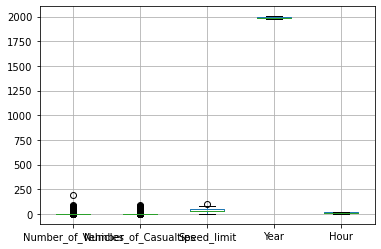

In [35]:
accidents.boxplot()

In [36]:
'''import altair as alt
from vega_datasets import data

source = df1

alt.Chart(source).mark_bar().encode(
    x='Year:O',
    y="Accident_Index:Q",    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Year == 1989,  # If the year is 1810 this test returns True,
        alt.value('blue'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
        
    )
).properties(
    width=600,title="plot"
).interactive()
    '''



'import altair as alt\nfrom vega_datasets import data\n\nsource = df1\n\nalt.Chart(source).mark_bar().encode(\n    x=\'Year:O\',\n    y="Accident_Index:Q",    # The highlight will be set on the result of a conditional statement\n    color=alt.condition(\n        alt.datum.Year == 1989,  # If the year is 1810 this test returns True,\n        alt.value(\'blue\'),     # which sets the bar orange.\n        alt.value(\'steelblue\')   # And if it\'s not true it sets the bar steelblue.\n        \n    )\n).properties(\n    width=600,title="plot"\n).interactive()\n    '

In [37]:
accidents.dtypes

Accident_Index                       object
Accident_Severity                    object
Number_of_Vehicles                    int64
Number_of_Casualties                  int64
Date                         datetime64[ns]
Day_of_Week                          object
1st_Road_Class                       object
Road_Type                            object
Speed_limit                           int64
Month                                object
Year                                  int32
Hour                                  int64
Daytime                              object
Road_Surface_Conditions_2            object
Weather_Conditions_2                 object
Light_Conditions_2                   object
Speed_limit_2                        object
dtype: object

In [38]:
accidents.to_csv('../../accidents_clean.csv',sep=',')

# Analysis and Visualization

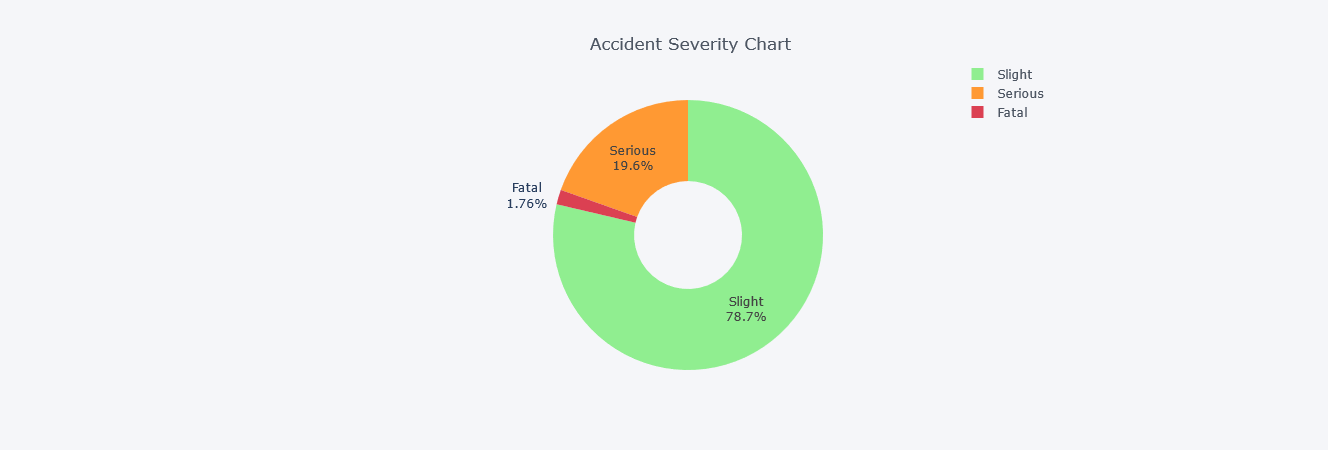

In [39]:
fig = accidents['Accident_Severity'].value_counts(normalize=True)\
                    .reset_index().iplot(kind='pie',
                    labels='index',values='Accident_Severity',
                    textinfo='percent+label',hole=0.4,
                    color = ['lightgreen', 'orange','red'],title='Accident Severity Chart',
                    asFigure=True,   )                
                                        
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.15,
    xanchor="left",
    x=0.85,
        ),
title_x=0.52

                 
                 )

fig.show()

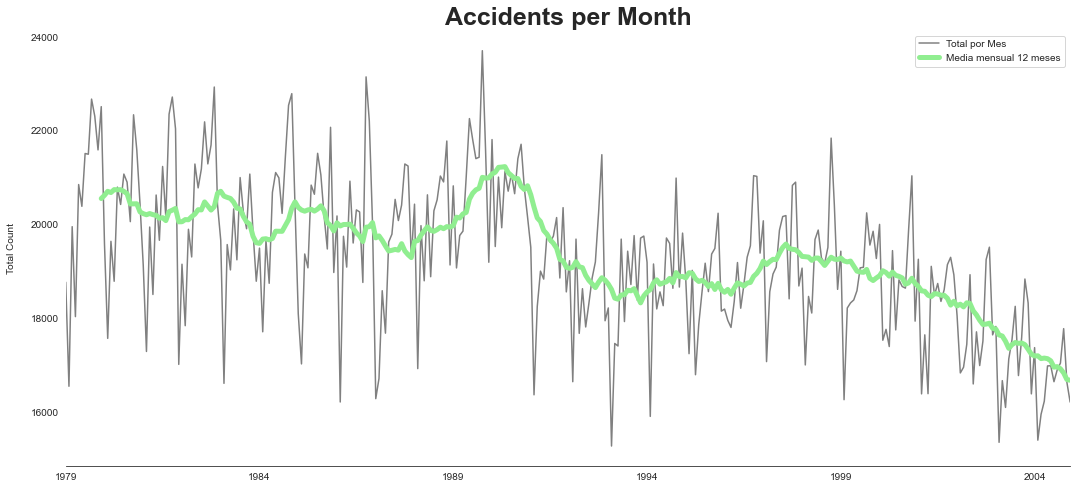

In [40]:
# Utilizarmos resample de la fecha para ponerla como índice y agruparla por mes, de esta manera
# podemos generar el gráfico con el total mensual y luego poder calcular una media con una ventana=12
# que son lso meses del año.

sns.set_style('white')
fig, ax = plt.subplots(figsize=(18,8))

accidents.set_index('Date').resample('M').size().plot(label='Total por Mes', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=12).mean()\
                           .plot(color='lightgreen', linewidth=5, label='Media mensual 12 meses', ax=ax)

ax.set_title('Accidents per Month', fontsize=25, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend()

sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

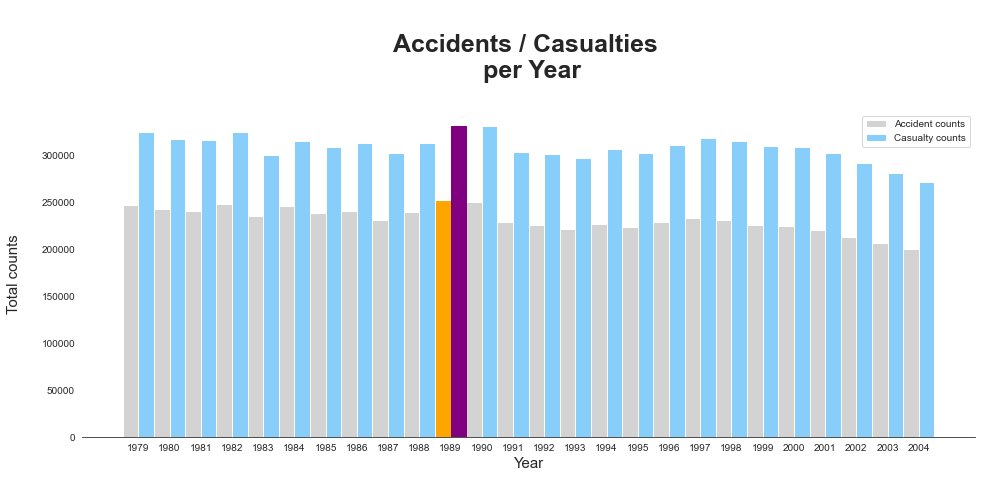

In [41]:
df1 = accidents.groupby(['Year'])\
.agg({'Accident_Index':'count', 'Number_of_Vehicles': 'sum','Number_of_Casualties': 'sum',})\
.reset_index()
#-------------------------
sns.set_style("white")

x = df1.Year
labels = df1.Year
width = 0.5
Accidentcounts = df1['Accident_Index']
Casualtycounts =  df1['Number_of_Casualties']
fig,ax =  plt.subplots(figsize=(16,6))

bar1 = ax.bar(x - width/2, Accidentcounts, width, label='Accident counts', color = 'lightgrey');
bar2 = ax.bar(x + width/2, Casualtycounts, width, label='Casualty counts', color = 'lightskyblue');
bar1[10].set_color('orange')
bar2[10].set_color('purple')
ax.set_title('\nAccidents / Casualties \n per Year\n', fontsize=25, fontweight='bold')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Total counts\n',fontsize=15)
ax.legend()
ax.set_xticks(x)
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);
plt.show();

# En qué meses hay más accidentes

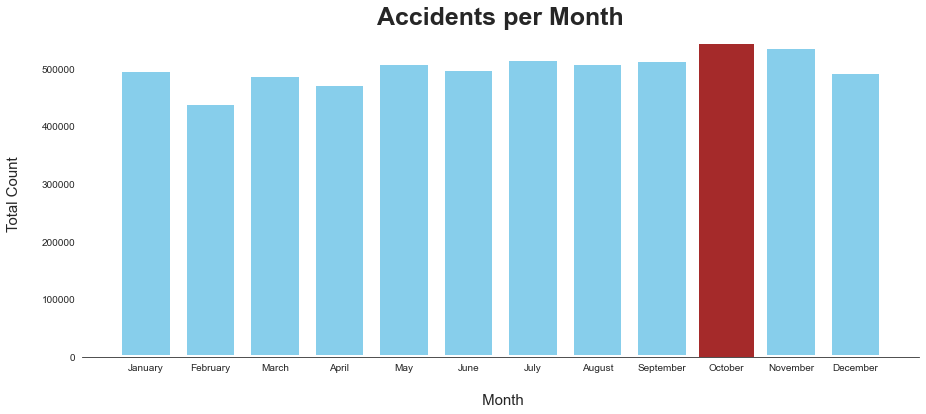

In [42]:
df2 = accidents.groupby(['Month'])['Accident_Index'].count().reset_index()

months = ['January', 'February','March','April', 'May','June','July','August', 'September','October','November','December']
df2['Month'] = pd.Categorical(df2['Month'], categories=months, ordered=True)
#df2.sort_values(...)  # same as you have now; can use inplace=True
df2 = df2.sort_values(by='Month')


sns.set_style("white")

x = df2['Month']
y = df2['Accident_Index']
fig, ax =  plt.subplots(figsize=(15,6))

bar1 = ax.bar(x,y,color='skyblue',linewidth=4)
bar1[9].set_color('brown')
ax.set_title('Accidents per Month', fontsize=25, fontweight='bold')
ax.set_xlabel('\n Month',fontsize=15)
ax.set_ylabel('Total Count\n',fontsize=15)
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);
plt.show();

In [43]:
df3 = accidents.groupby(['Day_of_Week'])['Accident_Index'].count().sort_values(ascending=False).reset_index()
days = ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
df3['Day_of_Week'] = pd.Categorical(df3['Day_of_Week'], categories=days, ordered=True)

df3 = df3.sort_values(by='Day_of_Week',ascending=True)

## Qué dia de la semana hay más accidentes?

'fig.update_layout(legend=dict(\n    yanchor="top",\n    y=1.15,\n    xanchor="left",\n    x=0.85,\n        ),\ntitle_x=0.52\n        )\n\nfig.show()'

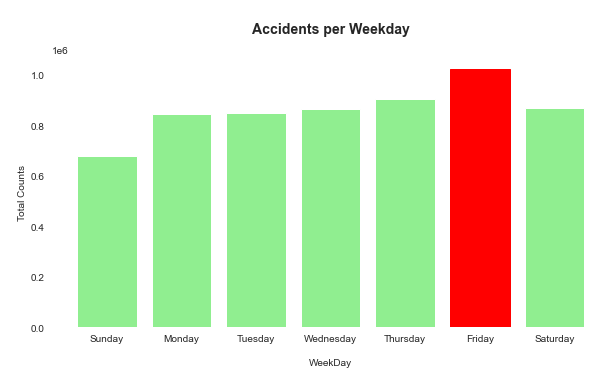

In [44]:
# sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))

barlist = plt.bar(df3['Day_of_Week'],df3['Accident_Index'],color='lightgreen')
barlist[5].set_color('r')

ax.set_title('\nAccidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts',xlabel='\nWeekDay')


# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

fig = df3.iplot(kind="bar",x='Day_of_Week',y='Accident_Index',asFigure=True,
     xTitle='Day of Week',yTitle='Total Counts',title='Total Accidents by DayofWeek',colors='#A63F00');


'''fig.update_layout(legend=dict(
    yanchor="top",
    y=1.15,
    xanchor="left",
    x=0.85,
        ),
title_x=0.52
        )

fig.show()'''

## Mapa de calor Weekday vs Daytime

In [45]:
df4 = accidents.groupby(['Day_of_Week','Daytime'])['Accident_Index'].count().reset_index()


days = ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
df4['Day_of_Week'] = pd.Categorical(df4['Day_of_Week'], categories=days, ordered=True)
df4 = df4.pivot(index='Day_of_Week', columns='Daytime', values='Accident_Index')
df4.sort_values(by='Day_of_Week',ascending=True)

Daytime,Commuting to home,Commuting to work,Evening,Night,Office hours
Day_of_Week,,,,,
Sunday,187286,45377,119074,113404,210443
Monday,278835,173146,128267,45499,219533
Tuesday,278342,178830,132567,43634,214875
Wednesday,281124,180827,137443,45866,216530
Thursday,291861,182698,148394,56106,224494
Friday,326440,175149,178630,89506,253517
Saturday,225541,79328,142303,127443,290741


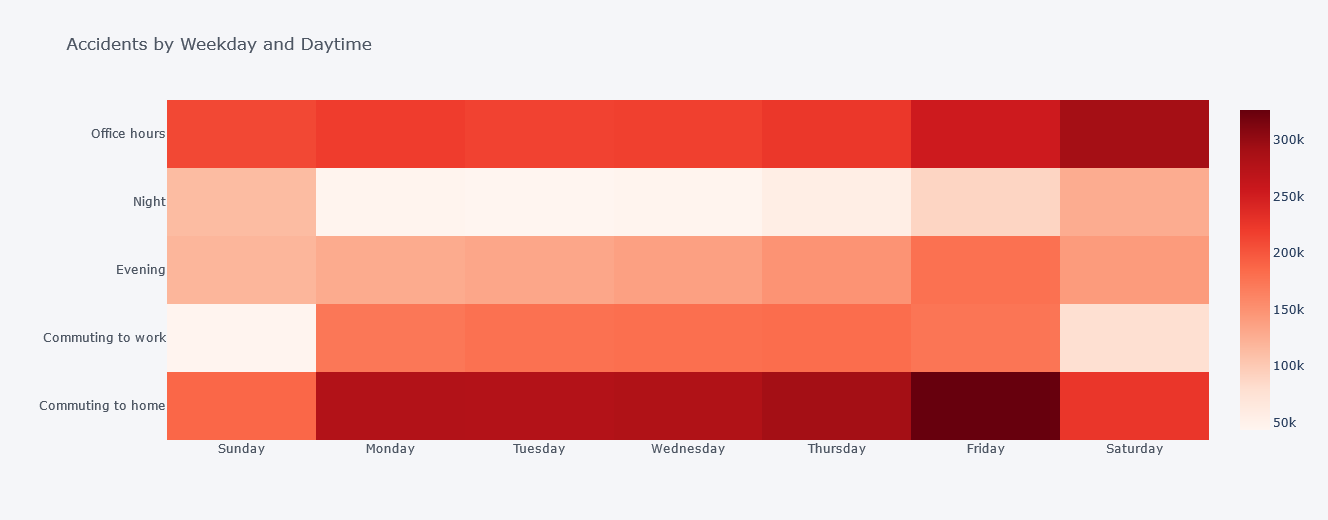

In [46]:
'''cmap = cm.get_cmap('PuBu')
plt.figure(figsize=(10,8))
weekday = ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
number=[1,2,3,4,5,6,7]
sns.heatmap(df4, cmap=cmap)
plt.title('\nAccidents by Weekday and Daytime\n', fontsize=14, fontweight='bold');
plt.yticks(rotation=0);

'''
df4.iplot(kind="heatmap",colorscale="Reds",dimensions=(670,520),title='Accidents by Weekday and Daytime')

In [47]:
df5 = accidents.groupby(['Day_of_Week','Accident_Severity','Light_Conditions_2'])['Number_of_Casualties'].sum().reset_index()
dayweek = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df5['Day_of_Week'] = pd.Categorical(df5['Day_of_Week'], categories=dayweek, ordered=True)
#df2.sort_values(...)  # same as you have now; can use inplace=True
df5 = df5.sort_values(by='Day_of_Week',ascending=True)
df5.head()

,Day_of_Week,Accident_Severity,Light_Conditions_2,Number_of_Casualties
20,Sunday,Serious,Bad,102944
19,Sunday,Fatal,Good,17934
18,Sunday,Fatal,Bad,15250
23,Sunday,Slight,Good,469840
22,Sunday,Slight,Bad,238113


In [48]:
accidents.head()

import altair as alt
from vega_datasets import data
days = ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
df5['Day_of_Week'] = pd.Categorical(df5['Day_of_Week'], categories=days, ordered=True)
#df5.sort_values(by='Day_of_Week',ascending=True,inplace=True)




source = df5

alt.Chart(source).mark_circle().encode(
    alt.X('Number_of_Casualties',scale=alt.Scale(zero=False)),
    alt.Y('Day_of_Week',scale=alt.Scale(zero=False, padding=1)),
    color='Accident_Severity',
    size='Light_Conditions_2'
).properties(
    width=900,
    height=400).interactive()
#por mas que lo intento no me ordena por weekday

alt.Chart(...)

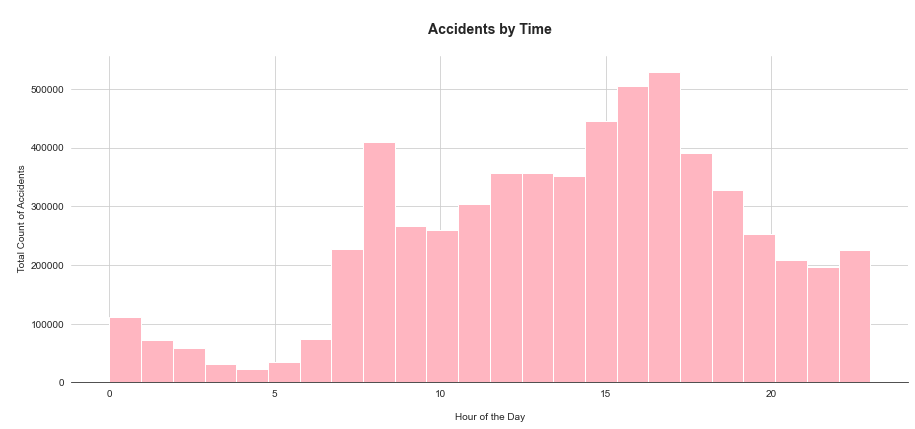

In [49]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))


accidents.Hour.hist(bins=24, ax=ax, color='lightpink')
ax.set_title('\nAccidents by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nHour of the Day', ylabel='\n Total Count of Accidents')
# remove all spines
sns.despine(top=True, right=True, left=True, bottom=False);

## Accident Severity vs Daytime

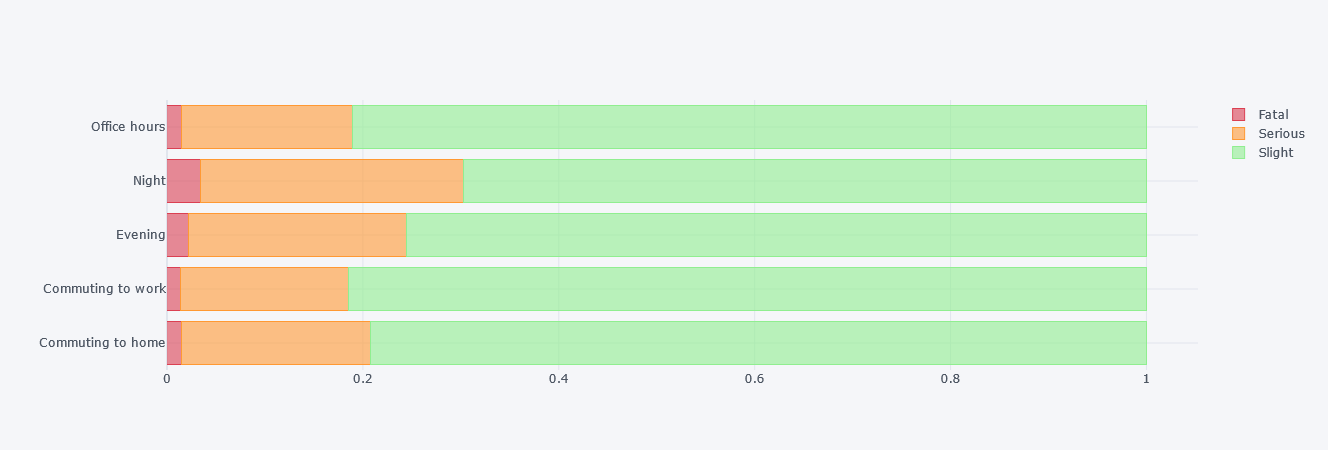

In [50]:
'''#df6 = accidents.groupby(['Daytime','Accident_Severity'])['Accident_Index'].count().reset_index()
fig, ax = plt.subplots(1, figsize=(15,6))
accidents.groupby('Daytime')['Accident_Severity'].value_counts(normalize=True).unstack().plot(kind='barh', stacked=True, color=['red', 'orange', 'lightgreen'], ax=ax)
ax.legend(loc='best', bbox_to_anchor=(1,1))
'''


accidents.groupby('Daytime')['Accident_Severity'].value_counts(normalize=True).unstack()\
                                                .iplot(
    kind='barh',barmode='stack', color=['red', 'orange', 'lightgreen'], ax=ax)

#falta pulir las properties.

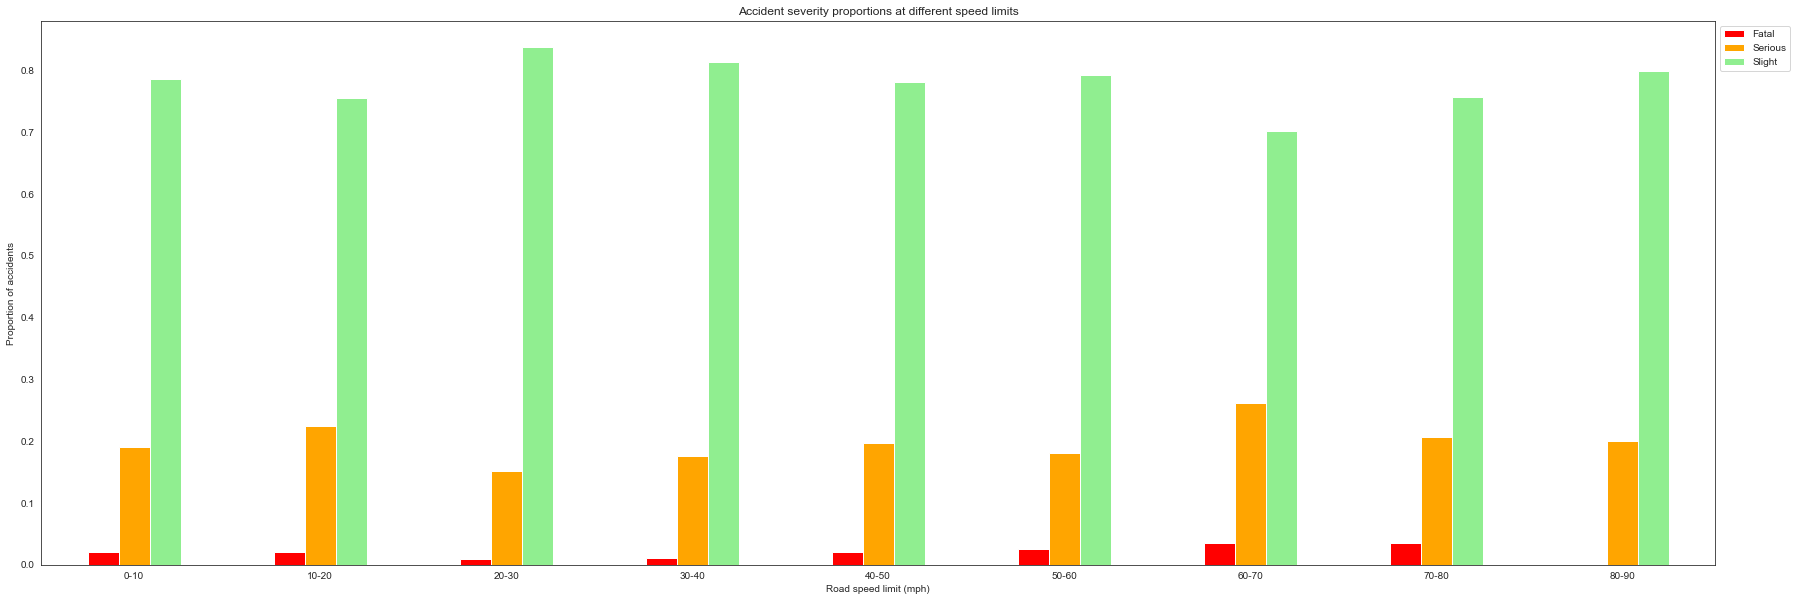

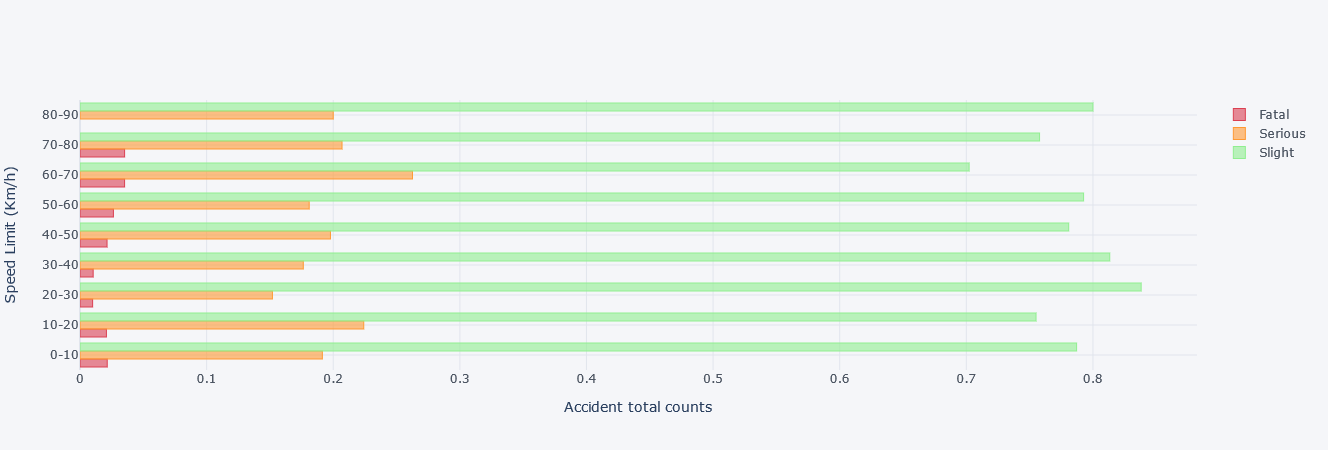

'fig2 = accidents.groupby([\'Speed_limit_2\'])[\'Number_of_Casualties\'].sum().iplot(kind=\'bar\',color=[\'red\', \'orange\', \'lightgreen\'], ax=ax,asFigure=True)\nfig2.layout.xaxis.title = "Casualty total counts"\nfig2.layout.yaxis.title = "Speed Limit (Km/h)"\nfig2.show()'

In [51]:
fig, ax = plt.subplots(1, figsize=(30,10))

accidents.groupby('Speed_limit_2')['Accident_Severity'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=False, color=['red', 'orange', 'lightgreen'], ax=ax)

ax.legend(loc='best', bbox_to_anchor=(1,1))

ax.set_title('Accident severity proportions at different speed limits')
ax.set_xlabel('Road speed limit (mph)',rotation=0)
ax.set_ylabel('Proportion of accidents')
plt.xticks(rotation=0)
plt.show()


fig = accidents.groupby(['Speed_limit_2'])['Accident_Severity'].value_counts(normalize=True).unstack().iplot(kind='barh',color=['red', 'orange', 'lightgreen'], ax=ax,asFigure=True)
fig.layout.xaxis.title = "Accident total counts"
fig.layout.yaxis.title = "Speed Limit (Km/h)"
fig.show()

'''fig2 = accidents.groupby(['Speed_limit_2'])['Number_of_Casualties'].sum().iplot(kind='bar',color=['red', 'orange', 'lightgreen'], ax=ax,asFigure=True)
fig2.layout.xaxis.title = "Casualty total counts"
fig2.layout.yaxis.title = "Speed Limit (Km/h)"
fig2.show()'''

In [52]:
#accidents['Speed_limit'] = accidents['Speed_limit'].apply(lambda x: np.log10(x+1))

alt.Chart(...)

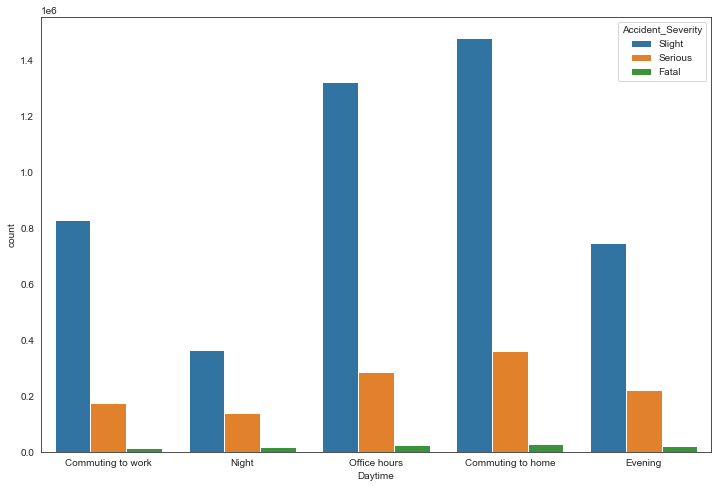

In [53]:


'''PLOT DAYTIME SEVERITY
PLOT DAYLIGHT SEVERITY
PLOT ROAD SURACE CONDITIONS SEVERITY
Road_Type VS SEVERITY
WEATHER CONDITIONS VS SEVERITY'''
#accidents.groupby(['Accident_Severity','Daytime']).size().reset_index().plot(kind='bar')
fig,ax=plt.subplots(figsize=(12,8))
sns.countplot(data=accidents, x='Daytime',hue='Accident_Severity');



import altair as alt

dfg= accidents.groupby(['Daytime','Accident_Severity'])['Accident_Index'].count().reset_index()
source = dfg

alt.Chart(source).mark_bar().encode(
    x='Daytime:O',
    y='Accident_Index:Q',
    color='Accident_Severity:N',
    column=':N'
).properties(
    width=900,
    height=400).interactive()

## VEHICLES

In [54]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
import io

In [56]:
veh=pd.read_csv('D:/Descargas/Stats19-Data1979-2004/Vehicles7904.csv',delimiter=',',encoding='UTF-8-SIG',usecols=[
    'Acc_Index','Vehicle_Type','Sex_of_Driver',
    'Age_Band_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle'
])

In [57]:
print("NaN data: \n \n"," \n ",veh.isna().sum()/len(veh),"%")
print("\n Missing or out of range data:\n",np.abs(veh[veh==-1].sum())/len(veh),"%")

NaN data: 
 
  
  Acc_Index                       0.0
Vehicle_Reference               0.0
Vehicle_Type                    0.0
Was_Vehicle_Left_Hand_Drive?    0.0
Sex_of_Driver                   0.0
Age_Band_of_Driver              0.0
Engine_Capacity_(CC)            0.0
Propulsion_Code                 0.0
Age_of_Vehicle                  0.0
dtype: float64 %

 Missing or out of range data:
 Acc_Index                            0.0
Vehicle_Reference                    0.0
Vehicle_Type                    0.000415
Was_Vehicle_Left_Hand_Drive?         1.0
Sex_of_Driver                   0.002102
Age_Band_of_Driver              0.076168
Engine_Capacity_(CC)            0.562982
Propulsion_Code                 0.552653
Age_of_Vehicle                  0.589046
dtype: object %


In [58]:
# drop missing or out of range values
veh.drop(labels='Was_Vehicle_Left_Hand_Drive?',inplace=True,axis=1)
veh.shape

(10981968, 8)

In [59]:
# drop missing or out of range values
for i,k in enumerate(veh):
    veh.drop(index=veh[veh[k] == -1].index, inplace=True,axis=1)

#veh.drop(index=veh[veh['Sex_of_Driver'] == -1].index, inplace=True)

In [60]:
veh.describe().T

,count,mean,std,min,25%,50%,75%,max
Vehicle_Reference,4172422.0,1.534609,1.039812,1.0,1.0,1.0,2.0,192.0
Vehicle_Type,4172422.0,101.271209,25.520779,1.0,109.0,109.0,109.0,113.0
Sex_of_Driver,4172422.0,1.311685,0.468608,1.0,1.0,1.0,2.0,3.0
Age_Band_of_Driver,4172422.0,6.476467,1.663363,1.0,5.0,6.0,7.0,11.0
Engine_Capacity_(CC),4172422.0,1727.149591,1534.046599,1.0,1256.0,1593.0,1850.0,99999.0
Propulsion_Code,4172422.0,1.154831,0.371686,1.0,1.0,1.0,1.0,9.0
Age_of_Vehicle,4172422.0,6.715993,4.217645,1.0,3.0,6.0,10.0,99.0


In [61]:
veh.shape

(4172422, 8)

In [62]:
veh.head()

,Acc_Index,Vehicle_Reference,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
4219716,198901AD00021,1,104,1,6,99,1,9
4219717,198901AD00021,2,108,1,8,2495,2,3
4219718,198901AD00022,1,104,1,6,249,1,7
4219719,198901AD00022,2,113,1,8,3858,2,8
4219724,198901AD00026,2,104,1,6,392,1,10


## CASUALTIES

In [63]:
cas=pd.read_csv('D:/Descargas/Stats19-Data1979-2004/Casualty7904.csv',delimiter=',',encoding='UTF-8-SIG')

In [64]:
print("NaN data: \n \n"," \n ",cas.isna().sum()/len(veh),"%")
print("\n Missing or out of range data:\n",np.abs(cas[veh==-1].sum())/len(veh),"%")

NaN data: 
 
  
  Acc_Index               0.0
Vehicle_Reference       0.0
Vehicle_Type            0.0
Sex_of_Driver           0.0
Age_Band_of_Driver      0.0
Engine_Capacity_(CC)    0.0
Propulsion_Code         0.0
Age_of_Vehicle          0.0
dtype: float64 %

 Missing or out of range data:
 Acc_Index               0.0
Vehicle_Reference       0.0
Vehicle_Type            0.0
Sex_of_Driver           0.0
Age_Band_of_Driver      0.0
Engine_Capacity_(CC)    0.0
Propulsion_Code         0.0
Age_of_Vehicle          0.0
dtype: object %


In [65]:
print(cas.describe().T)
cas.shape
cas.columns

                                        count       mean        std  min  25%  \
Vehicle_Reference                   8264687.0   1.409508   0.687647  0.0  1.0   
Casualty_Reference                  8264687.0   1.431801   1.461825  0.0  1.0   
Casualty_Class                      8264687.0   1.599326   0.754204  1.0  1.0   
Sex_of_Casualty                     8264687.0   1.397635   0.492329 -1.0  1.0   
Age_Band_of_Casualty                8264687.0   5.603401   2.437791 -1.0  4.0   
Casualty_Severity                   8264687.0   2.798114   0.435357  1.0  3.0   
Pedestrian_Location                 8264687.0   0.855259   2.090907 -1.0  0.0   
Pedestrian_Movement                 8264687.0   0.536895   1.612887 -1.0  0.0   
Car_Passenger                       8264687.0   0.297970   0.615665 -1.0  0.0   
Bus_or_Coach_Passenger              8264687.0   0.088092   0.555045 -1.0  0.0   
Pedestrian_Road_Maintenance_Worker  8264687.0  -0.164345   0.370588 -1.0  0.0   
Casualty_Type               

Index(['Acc_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [66]:
%who
df_merge = pd.merge(cas,veh,how='inner',on='Acc_Index')

cas	 cm	 cmap	 i	 io	 k	 np	 pd	 plt	 
sns	 veh	 


In [67]:
del veh,cas
df_merge.columns
df_merge.shape

(6173288, 21)

In [68]:
print(df_merge.shape)
df_merge.head()

(6173288, 21)


,Acc_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Vehicle_Reference_y,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,198901AD00021,1,1,1,1,6,3,0,0,0,0,0,104,-1,1,104,1,6,99,1,9
1,198901AD00021,1,1,1,1,6,3,0,0,0,0,0,104,-1,2,108,1,8,2495,2,3
2,198901AD00022,1,1,1,1,6,3,0,0,0,0,0,104,-1,1,104,1,6,249,1,7
3,198901AD00022,1,1,1,1,6,3,0,0,0,0,0,104,-1,2,113,1,8,3858,2,8
4,198901AD00026,2,1,1,1,6,3,0,0,0,0,0,104,-1,2,104,1,6,392,1,10


In [69]:
print("NaN data: \n \n"," \n ",df_merge.isna().sum()/len(df_merge),"%")
print("\n Missing or out of range data:\n",np.abs(df_merge[df_merge==-1].sum())/len(df_merge),"%")

NaN data: 
 
  
  Acc_Index                             0.0
Vehicle_Reference_x                   0.0
Casualty_Reference                    0.0
Casualty_Class                        0.0
Sex_of_Casualty                       0.0
Age_Band_of_Casualty                  0.0
Casualty_Severity                     0.0
Pedestrian_Location                   0.0
Pedestrian_Movement                   0.0
Car_Passenger                         0.0
Bus_or_Coach_Passenger                0.0
Pedestrian_Road_Maintenance_Worker    0.0
Casualty_Type                         0.0
Casualty_Home_Area_Type               0.0
Vehicle_Reference_y                   0.0
Vehicle_Type                          0.0
Sex_of_Driver                         0.0
Age_Band_of_Driver                    0.0
Engine_Capacity_(CC)                  0.0
Propulsion_Code                       0.0
Age_of_Vehicle                        0.0
dtype: float64 %

 Missing or out of range data:
 Acc_Index                                  0.0
Veh

In [70]:
df_merge.drop(labels=['Casualty_Home_Area_Type','Pedestrian_Road_Maintenance_Worker','Pedestrian_Location',
              'Casualty_Class','Vehicle_Reference_y','Vehicle_Reference_x','Casualty_Home_Area_Type',
              'Pedestrian_Road_Maintenance_Worker','Car_Passenger','Pedestrian_Movement','Pedestrian_Location',
                'Casualty_Severity','Casualty_Reference','Bus_or_Coach_Passenger'],inplace=True,axis=1)


In [71]:
df_merge.head()

,Acc_Index,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Type,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,198901AD00021,1,6,104,104,1,6,99,1,9
1,198901AD00021,1,6,104,108,1,8,2495,2,3
2,198901AD00022,1,6,104,104,1,6,249,1,7
3,198901AD00022,1,6,104,113,1,8,3858,2,8
4,198901AD00026,1,6,104,104,1,6,392,1,10


In [72]:
for i,k in enumerate(df_merge):
    df_merge.drop(index=df_merge[df_merge[k] == -1].index, inplace=True,axis=1)

In [73]:
#Drop unknown values of Sex_of_Driver
df_merge.drop(index=df_merge[df_merge['Sex_of_Driver'] == 3].index, inplace=True,axis=1)

In [74]:
df_merge.shape

(6082637, 10)

In [75]:
df_merge.to_csv('../../df_merged_cat.csv',sep=',',index = True)

In [76]:
df_merge.Sex_of_Casualty = df_merge.Sex_of_Casualty.replace([1,2],['Male','Female'])

df_merge.Age_Band_of_Casualty = df_merge.Age_Band_of_Casualty.replace([1,2,3,4,5,6,7,8,9,10,11],['0 - 5','6 - 10','11 - 15',
                                                                                                 '16 - 20','21 - 25','26 - 35',
                                                                                              '36 - 45','46 - 55','56 - 65',
                                                                                              '66 - 75','Over 75'
                                                                                                ])

values1=['Pedestrian',
'Cyclist',
'Motorcycle 50cc and under rider or passenger',
'Motorcycle 125cc and under rider or passenger',
'Motorcycle over 125cc and up to 500cc rider or  passenger',
'Motorcycle over 500cc rider or passenger',
'Taxi/Private hire car occupant',
'Car occupant',
'Minibus (8 - 16 passenger seats) occupant',
'Bus or coach occupant (17 or more pass seats)',
'Horse rider',
'Agricultural vehicle occupant',
'Tram occupant',
'Van / Goods vehicle (3.5 tonnes mgw or under) occupant',
'Goods vehicle (over 3.5t. and under 7.5t.) occupant',
'Goods vehicle (7.5 tonnes mgw and over) occupant',
'Mobility scooter rider',
'Electric motorcycle rider or passenger',
'Other vehicle occupant',
'Motorcycle - unknown cc rider or passenger',
'Goods vehicle (unknown weight) occupant',
'Motorcycle - Scooter rider or passenger',
'Motorcycle rider or passenger',
'Motorcycle - Combination rider or passenger',
'Motorcycle over 125cc rider or passenger',
'Taxi (excluding private hire cars) occupant',
'Car occupant (including private hire cars)',
'Minibus/Motor caravan occupant',
'Goods vehicle (over 3.5 tonnes) occupant']
values2 = [0,1,2,3,4,5,8,9,10,11,16,17,18,19,
20,21,22,23,90,97,98,103,104,105,
106,108,109,110,113]

values3 = [1,2,3,10,11,17,19,20,
21,90,103,104,105,
106,108,109,110,113]

values4 = ['Pedal cycle',
'Motorcycle 50cc and under',
'Motorcycle 125cc and under',
'Minibus (8 - 16 passenger seats)',
'Bus or coach (17 or more pass seats)',
'Agricultural vehicle',
'Van / Goods 3.5 tonnes mgw or under',
'Goods over 3.5t. and under 7.5t',
'Goods 7.5 tonnes mgw and over',
'Other vehicle',
'Motorcycle - Scooter',
'Motorcycle',
'Motorcycle - Combination',
'Motorcycle over 125cc',
'Taxi (excluding private hire cars)',
'Car (including private hire cars)',
'Minibus/Motor caravan',
'Goods vehicle over 3.5 tonnes']



df_merge.Casualty_Type = df_merge.Casualty_Type.replace(values2,values1)


df_merge.Vehicle_Type = df_merge.Vehicle_Type.replace(values3,values4)

df_merge.Sex_of_Driver = df_merge.Sex_of_Driver.replace([1,2],['Male','Female'])

df_merge.Age_Band_of_Driver = df_merge.Age_Band_of_Driver.replace([1,2,3,4,5,6,7,8,9,10,11],['0 - 5','6 - 10','11 - 15',
                                                                                                 '16 - 20','21 - 25','26 - 35',
                                                                                              '36 - 45','46 - 55','56 - 65',
                                                                                              '66 - 75','Over 75'
                                                                                                ])
#df_merge.Engine_Capacity_(CC) = df_merge.Engine_Capacity_(CC).replace([1,2],['Male','Female']) -->drop column

df_merge.Propulsion_Code = df_merge.Propulsion_Code.replace([1,2,4,5,6,7,8,9],['Petrol',
                                                                    'Heavy oil',
                                                                    'Steam',
                                                                    'Gas',
                                                                    'Petrol/Gas (LPG)',
                                                                    'Gas/Bi-fuel',
                                                                    'Hybrid electric',
                                                                    'Fuel cells'])


In [77]:
df_merge.head()

,Acc_Index,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Type,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,198901AD00021,Male,26 - 35,Motorcycle rider or passenger,Motorcycle,Male,26 - 35,99,Petrol,9
1,198901AD00021,Male,26 - 35,Motorcycle rider or passenger,Taxi (excluding private hire cars),Male,46 - 55,2495,Heavy oil,3
2,198901AD00022,Male,26 - 35,Motorcycle rider or passenger,Motorcycle,Male,26 - 35,249,Petrol,7
3,198901AD00022,Male,26 - 35,Motorcycle rider or passenger,Goods vehicle over 3.5 tonnes,Male,46 - 55,3858,Heavy oil,8
4,198901AD00026,Male,26 - 35,Motorcycle rider or passenger,Motorcycle,Male,26 - 35,392,Petrol,10


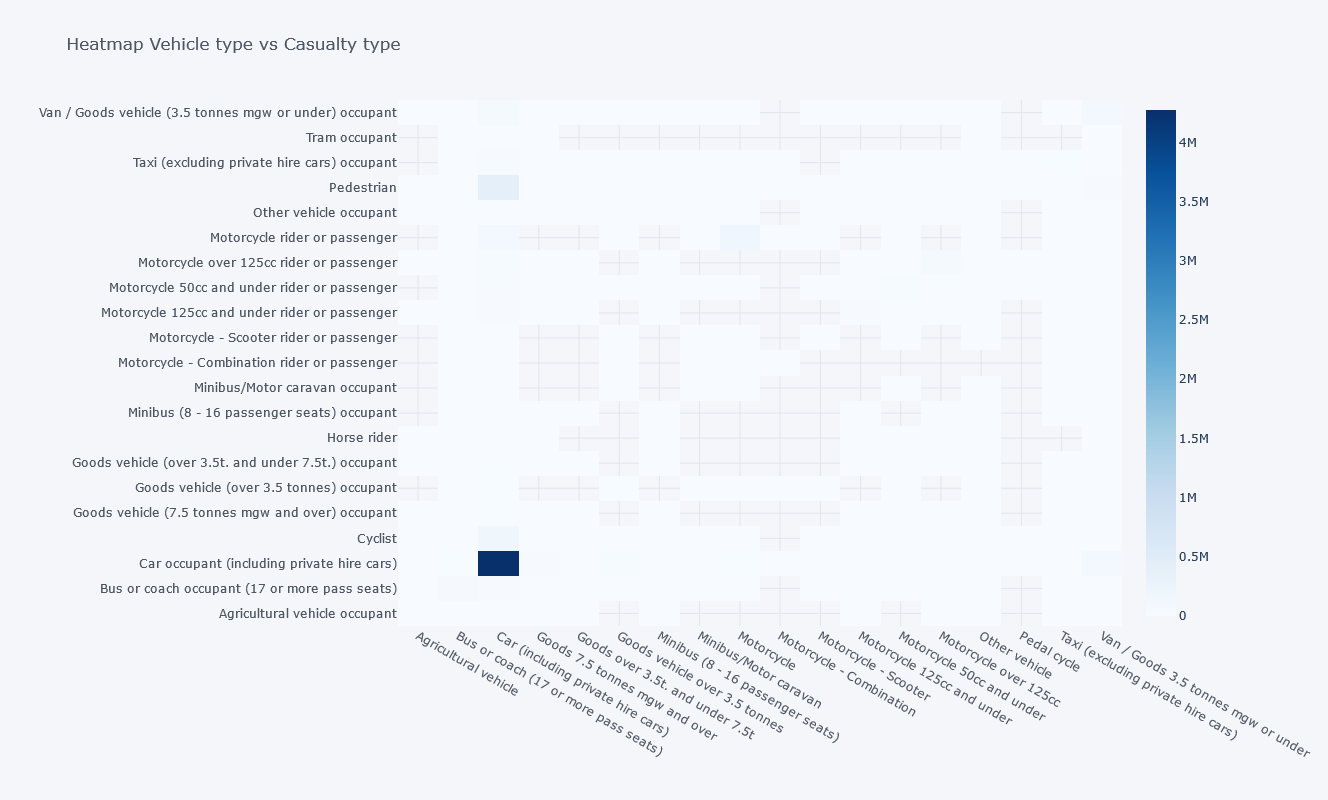

In [78]:
dfh = df_merge.groupby(['Vehicle_Type','Casualty_Type'])['Acc_Index'].count().reset_index()
dfh.pivot(index='Vehicle_Type', columns=['Casualty_Type'], values='Acc_Index').iplot(kind="heatmap"
                                                                                ,colorscale="Blues",
                                                                                 dimensions=(1000,800),
                                                                                  title='Heatmap Vehicle type vs Casualty type')



In [79]:
df_merge['Vehicle_Type'].value_counts(normalize=True)

Car (including private hire cars)       0.860841
Van / Goods 3.5 tonnes mgw or under     0.042547
Motorcycle                              0.031032
Bus or coach (17 or more pass seats)    0.013765
Motorcycle over 125cc                   0.013325
Goods vehicle over 3.5 tonnes           0.010227
Goods 7.5 tonnes mgw and over           0.006040
Motorcycle 50cc and under               0.005856
Taxi (excluding private hire cars)      0.005039
Motorcycle 125cc and under              0.004550
Minibus/Motor caravan                   0.002288
Other vehicle                           0.001932
Minibus (8 - 16 passenger seats)        0.001122
Goods over 3.5t. and under 7.5t         0.000799
Motorcycle - Scooter                    0.000506
Agricultural vehicle                    0.000105
Motorcycle - Combination                0.000017
Pedal cycle                             0.000009
Name: Vehicle_Type, dtype: float64

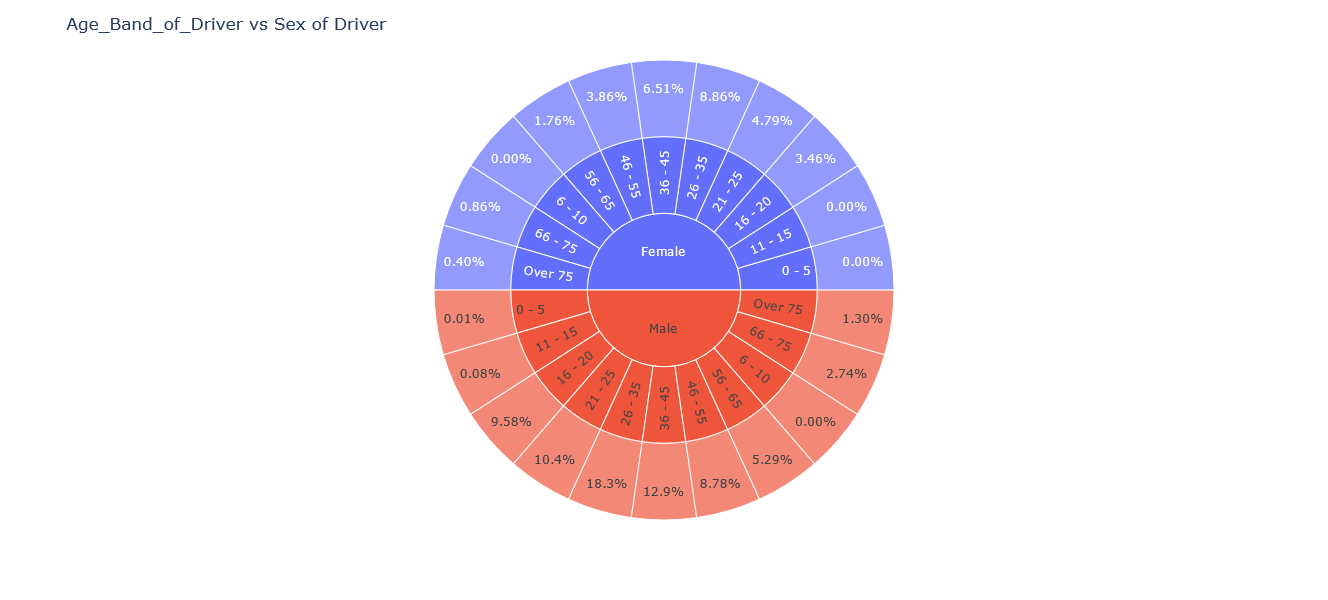

In [80]:
driver = df_merge.groupby(['Age_Band_of_Driver','Sex_of_Driver'])['Acc_Index'].count().reset_index()
driver['%'] = (driver['Acc_Index']/driver['Acc_Index'].sum()*100).sort_values(ascending=True).astype(str).str[:4]+'%'

from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(1,2)
import plotly.express as px

fig1 = px.sunburst(driver, path=['Sex_of_Driver','Age_Band_of_Driver','%'], color='Sex_of_Driver')
fig1.update_layout(height=600, width=600, title_text="Age_Band_of_Driver vs Sex of Driver")
fig1.show()
#PORCENTAJE DRIVERS IMPLICADOS

In [81]:
casualty = df_merge.groupby(['Age_Band_of_Casualty','Sex_of_Casualty'])['Acc_Index'].count().reset_index()
casualty['Percentage'] = (casualty['Acc_Index']/casualty['Acc_Index'].sum()*100).sort_values(ascending=True)


#y de esto
#casualty = casualty.sort_values(by='Percentage',ascending=True)

<AxesSubplot:>

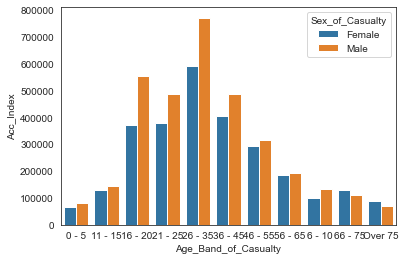

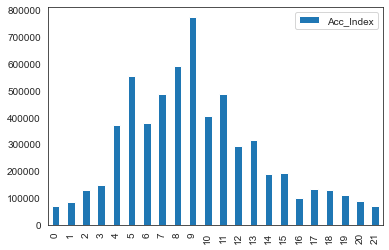

In [82]:
sns.barplot(data=casualty,x='Age_Band_of_Casualty',y='Acc_Index',hue='Sex_of_Casualty')

df_merge.groupby(['Age_Band_of_Casualty','Sex_of_Casualty'])['Acc_Index'].count().reset_index().plot(kind='bar')

In [83]:
df_merge['Engine_Capacity_(CC)'].value_counts()

1598     329646
1597     264014
1998     213550
1796     186537
998      158030
          ...  
689           1
2456          1
695           1
12988         1
5802          1
Name: Engine_Capacity_(CC), Length: 4118, dtype: int64

In [84]:
df_merge['Propulsion_Code'].value_counts()

Petrol              5128160
Heavy oil            952282
Petrol/Gas (LPG)       1476
Gas                     335
Gas/Bi-fuel             290
Steam                    70
Hybrid electric          23
Fuel cells                1
Name: Propulsion_Code, dtype: int64

In [85]:
df_merge['Age_of_Vehicle'].value_counts()

1     590394
2     551636
3     519521
4     509471
5     494342
       ...  
90         1
91         1
93         1
95         1
96         1
Name: Age_of_Vehicle, Length: 86, dtype: int64

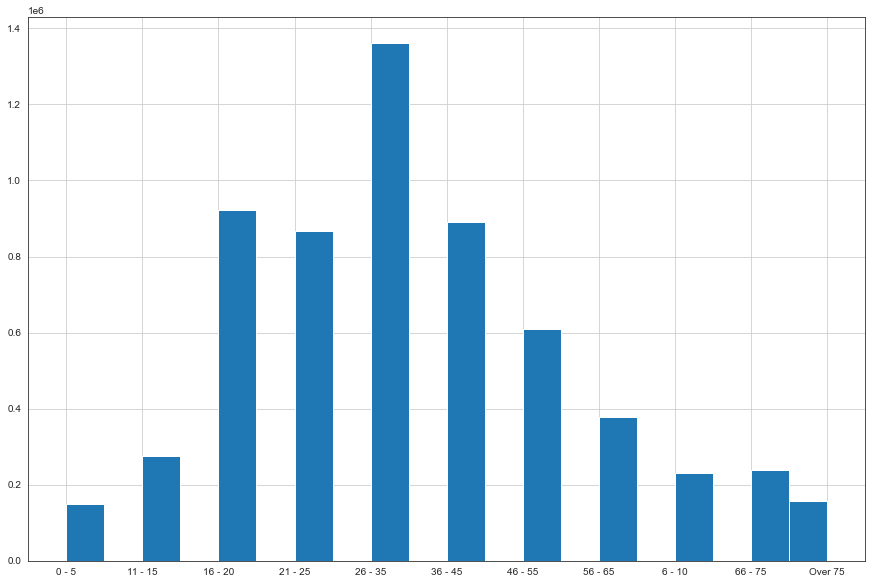

In [86]:
df_merge['Age_Band_of_Casualty'].sort_values().hist(bins=20,figsize=(15,10));

In [87]:
'''import plotly.graph_objects as go

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],
    name='Primary Product',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[19, 14, 22, 14, 16, 19, 15, 14, 10, 12, 12, 16],
    name='Secondary Product',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()'''

"import plotly.graph_objects as go\n\nmonths = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',\n          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']\n\nfig = go.Figure()\nfig.add_trace(go.Bar(\n    x=months,\n    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],\n    name='Primary Product',\n    marker_color='indianred'\n))\nfig.add_trace(go.Bar(\n    x=months,\n    y=[19, 14, 22, 14, 16, 19, 15, 14, 10, 12, 12, 16],\n    name='Secondary Product',\n    marker_color='lightsalmon'\n))\n\n# Here we modify the tickangle of the xaxis, resulting in rotated labels.\nfig.update_layout(barmode='group', xaxis_tickangle=-45)\nfig.show()"

In [88]:
#df_merge.Engine_Capacity_(CC) = df_merge.Engine_Capacity_(CC).replace([1,2],['Male','Female']) -->drop column
veh_type = df_merge.groupby(['Sex_of_Driver','Vehicle_Type'])['Acc_Index'].count().reset_index()
veh_type['Percentage'] = (veh_type['Acc_Index']/veh_type['Acc_Index'].sum()*100).sort_values(ascending=True)#.astype(str).str[:4]+'%'

#FALTA PLOT

In [89]:
df_merge.head()

,Acc_Index,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Type,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,198901AD00021,Male,26 - 35,Motorcycle rider or passenger,Motorcycle,Male,26 - 35,99,Petrol,9
1,198901AD00021,Male,26 - 35,Motorcycle rider or passenger,Taxi (excluding private hire cars),Male,46 - 55,2495,Heavy oil,3
2,198901AD00022,Male,26 - 35,Motorcycle rider or passenger,Motorcycle,Male,26 - 35,249,Petrol,7
3,198901AD00022,Male,26 - 35,Motorcycle rider or passenger,Goods vehicle over 3.5 tonnes,Male,46 - 55,3858,Heavy oil,8
4,198901AD00026,Male,26 - 35,Motorcycle rider or passenger,Motorcycle,Male,26 - 35,392,Petrol,10


In [ ]:
hola

In [95]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [91]:
## Data Pre-Processing

### Feature Engineering

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
explained_variance_score,recall_score,f1_score,precision_score,roc_curve,roc_auc_score,accuracy_score,confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression  #regresión logistica en clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier



pd.set_option('display.max_columns', None)
%matplotlib inline

In [93]:
dfa = pd.read_csv('D:\Descargas\Stats19-Data1979-2004\Accidents7904.csv',delimiter=',',encoding='UTF-8-SIG',index_col=0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-93-8d9615a1ee52>", line 1, in <module>
    dfa = pd.read_csv('D:\Descargas\Stats19-Data1979-2004\Accidents7904.csv',delimiter=',',encoding='UTF-8-SIG',index_col=0)
  File "C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\pandas\io\parsers.py", line 610, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\pandas\io\parsers.py", line 468, in _read
    return parser.read(nrows)
  File "C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\pandas\io\parsers.py", line 1057, in read
    index, columns, col_dict = self._engine.read(nrows)
  File "C:\Users\hexen\anaconda3\envs\tfm\lib\site-packages\pandas\io\parsers.py", line 2061, in read
    data = self._reader.read(nrows)
  File "pandas\_libs\parsers.p

TypeError: object of type 'NoneType' has no len()

In [ ]:
dfm = pd.read_csv('D:/Descargas/Stats19-Data1979-2004/df_merged.csv',delimiter=',',encoding='UTF-8-SIG',index_col=0)

In [ ]:
#dfm.drop(columns=['Sex_of_Casualty','Age_Band_of_Casualty','Casualty_Type','Propulsion_Code'],inplace=True)

In [ ]:
dfa = dfa.reset_index()

In [ ]:
dfa.head()

In [ ]:
dfa.rename(columns = {'Accident_Index':'Acc_Index'}, inplace = True)

In [ ]:
dfmerged = pd.merge(dfa,dfm,how='inner',on= 'Acc_Index')

In [ ]:
dfmerged.head()

In [ ]:
dfmerged.drop(columns=['Sex_of_Casualty','Age_Band_of_Casualty','Casualty_Type','Propulsion_Code'],inplace=True)

In [ ]:
del dfa,dfm

In [ ]:
dfmerged.shape

In [ ]:
dfmerged.dtypes

In [ ]:
dfmerged.isna().sum()/len(dfmerged)

In [ ]:
dfmerged['Hour'] = pd.to_datetime(dfmerged['Time']).dt.hour
dfmerged.Hour.fillna(dfmerged.Hour.median(), inplace=True)
dfmerged.Hour =  dfmerged.Hour.astype('int64')

In [ ]:
#for i,k in enumerate(accidents):
np.abs(dfmerged[dfmerged == -1].sum())/len(dfmerged)
    
#for i,k in enumerate(accidents):
   # accidents.drop(index=accidents[accidents[k] == -1].index, inplace=True)

In [ ]:
dfmerged.head()

In [ ]:
dfmerged.drop(['Did_Police_Officer_Attend_Scene_of_Accident','Urban_or_Rural_Area',
          'Junction_Control','2nd_Road_Class',
          'Latitude','Longitude',
          'Location_Easting_OSGR','Local_Authority_(District)',
          'Local_Authority_(Highway)','Location_Northing_OSGR',
          'LSOA_of_Accident_Location','1st_Road_Number','Junction_Detail',
          '2nd_Road_Number','Pedestrian_Crossing-Physical_Facilities',
          'Pedestrian_Crossing-Human_Control','Urban_or_Rural_Area',
          'Date','Time','Special_Conditions_at_Site'
         ],
               inplace=True,axis=1)


In [ ]:
#DROP MISSING VALUES =  -1
for i,k in enumerate(dfmerged):
    dfmerged.drop(index=dfmerged[dfmerged[k] == -1].index, inplace=True)

In [ ]:
#DROP NaN's
dfmerged.dropna(inplace=True)

In [ ]:
for col in ['Acc_Index', 'Police_Force', 'Accident_Severity',
       'Day_of_Week', '1st_Road_Class', 'Road_Type',
       'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Engine_Capacity_(CC)',
       'Age_of_Vehicle', 'Hour']:
    dfmerged[col] = dfmerged[col].astype('object')

In [ ]:
dfmerged = pd.DataFrame(dfmerged, columns = ['Accident_Severity','Acc_Index', 'Police_Force','Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', 'Road_Type',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Engine_Capacity_(CC)',
       'Age_of_Vehicle', 'Hour'])

dfmerged.drop(['Acc_Index'],axis=1,inplace=True)

In [ ]:
dfmerged.drop('Hour', axis=1,inplace=True)

In [ ]:
features = dfmerged[dfmerged.columns[1:]]
target = dfmerged[dfmerged.columns[0]]

In [ ]:
X = dfmerged.drop('Accident_Severity', axis=1)
y = dfmerged['Accident_Severity']
y=y.astype('int')

In [ ]:
cat = ['Police_Force',
       'Day_of_Week', '1st_Road_Class', 'Road_Type',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Engine_Capacity_(CC)',
       'Age_of_Vehicle']
num  = ['Number_of_Casualties','Number_of_Vehicles','Speed_limit']

t = ['Accident_Severity']

#### Define the sklearn pipeline

In [ ]:
def evaluate_model(num,cat):

    numeric_features = num
    categorical_features = cat
    target = t
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


    categorical_transformer = LabelEncoder()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ])

    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(solver='lbfgs',max_iter=1000))])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=0)

    clf.fit(X_train, y_train)
    print("model score: %.3f" % clf.score(X_test, y_test))
    yhat = clf.predict(X_test)

#from sklearn.tree import DecisionTreeClassifier

#tree = DecisionTreeClassifier()
#bgg = BaggingClassifier()
#forest = RandomForestClassifier()

In [ ]:
evaluate_model(num,cat)

In [ ]:
yhat = clf.predict(X_test)

In [ ]:
#roc_auc_score(y_train, clf.predict_proba(X), multi_class='ovr')

In [ ]:
accuracy = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat,average=None)
f1score =  f1_score(y_test, yhat,average=None)
precision = precision_score(y_test, yhat,average=None)
print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f',recall*100)
print('f1 score: %.2f',f1score*100)
print('Precision: %.2f',precision*100)

In [ ]:
#eval_features(X_train, X_test, y_train, y_test, clf)

In [ ]:
def eval_features(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    probs = classifier.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

    plt.plot(fpr, tpr)
    return accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds), roc_auc_score(y_test, preds)

In [ ]:
print(classification_report(y_test, yhat))

eval_features(X_train, X_test, y_train, y_test, clf)

In [ ]:
accuracy = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat,average=None)
f1score =  f1_score(y_test, yhat,average=None)
precision = precision_score(y_test, yhat,average=None)
print('Accuracy: %.2f' % (accuracy*100))
print('Recall:',recall)
print('f1 score:',f1score)
print('Precision:',precision)

### Process numerical data

### Process categorical data

In [ ]:
# Define which columns should be encoded vs scaled
target =  dfmerged[['Accident_Severity']]
features = dfmerged.drop(['Accident_Severity'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=0)

num_features = ['Number_of_Vehicles','Number_of_Casualties','Speed_limit']
cat_features = ['Accident_Severity', 'Police_Force',
       'Day_of_Week', '1st_Road_Class', 'Road_Type',
       'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Engine_Capacity_(CC)',
       'Age_of_Vehicle']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(dfmerged[num_features]) 
encoded_columns = ohe.fit_transform(dfmerged[cat_features])
encoded_target = ohe.fit_transform(target).reshape(-1,1)


# Concatenate (Column-Bind) Processed Columns Back Together
categorical_data = np.concatenate([encoded_columns,scaled_columns], axis=1)

In [ ]:
dfmerged = pd.DataFrame(dfmerged, columns= ['Accident_Severity','Number_of_Vehicles',
'Number_of_Casualties',
'Police_Force',
'Day_of_Week',
'1st_Road_Class',
'Road_Type',
'Speed_limit',
'Light_Conditions',
'Weather_Conditions',
'Road_Surface_Conditions',
'Carriageway_Hazards',
'Hour',
'Vehicle_Type',
'Sex_of_Driver',
'Age_Band_of_Driver',
'Engine_Capacity_(CC)',
'Age_of_Vehicle'])

In [ ]:
'''def evaluate(X_test, ys_test, ys_hat):
    #plt.scatter(X_test, ys_test)
    #plt.scatter(X_test, ys_hat)

    mse = mean_squared_error(ys_test, ys_hat)
    mae = mean_absolute_error(ys_test, ys_hat)
    mape = np.mean(np.abs(ys_test - ys_hat) / ys_test)
    ev = explained_variance_score(ys_test, ys_hat)
    f1s = f1_score(y_test,ys_hat)

    return mse, mae, mape, ev, f1s'''

In [ ]:
def eval_features(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    probs = classifier.predict_proba(X_test)
    
    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=i)
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=300);   
    
    #fpr, tpr, thresholds = roc_curve(y_test, probs)
    #roc_auc_score(y_test, probs, multi_class='ovo', average='weighted')
    return roc_auc_score(y_test, probs,multi_class='ovo', average='weighted')

In [ ]:
n_rows=int(2e6)
#Creating matrix of dependent and independent variable

# independent variables representing with X

X=dfmerged.iloc[:n_rows,1:].values

Y=dfmerged.iloc[:n_rows,[0]].values.reshape(-1,1)

#########################################################

#Taking of missing data with help of SimpleImputer class

#from sklearn.impute import SimpleImputer as si

#imputer=si(missing_values=np.NaN, strategy="mean")

#imputer=imputer.fit(X[:,1:3])

#X[:,1:3]=imputer.transform(X[:,1:3])

############################################ 

#Encoding the Categorical data from dataset

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X=LabelEncoder()


X[:,3]=labelencoder_X.fit_transform(X[:,3])

onehotencoder=OneHotEncoder(handle_unknown='ignore')

X=onehotencoder.fit_transform(X)


labelencoder_Y=LabelEncoder()

Y=labelencoder_Y.fit_transform(Y)

###################################

#Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
##################################

#Feature scaling

from sklearn.preprocessing import StandardScaler

scale_X=StandardScaler(with_mean=False)

X_train=scale_X.fit_transform(X_train)

X_test=scale_X.transform(X_test)

#Train our model
##################################
model = LogisticRegression(solver='lbfgs',max_iter=1000)
# fit on the training set
model.fit(X_train, y_train.reshape(-1,))
# predict on test set
yhat = model.predict(X_test)
yhat = yhat
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
recall = recall_score(y_test, yhat,average='weighted')
f1score =  f1_score(y_test, yhat,average='weighted')
precision = precision_score(y_test, yhat,average='weighted')
print('Accuracy: %.2f' % (accuracy*100))
print('Recall:',recall)
print('f1 score:',f1score)
print('Precision:',precision)
target_names = 'Accident_Severity'

print(classification_report(y_test, yhat))

eval_features(X_train, X_test, y_train, y_test, model)

In [ ]:
n_class=3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred[:,i], pos_label=i)

In [ ]:
from collections import Counter
#to understand the distribution of train and test labels.
Counter(y_train),Counter(y_test)

In [ ]:
#CONFUSION MATRIX
matrix = confusion_matrix(y_test, yhat)

dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [ ]:

# Plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Figure setup
fig = make_subplots(rows=12, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.02)
# Traces
sev1 = dfmerged[dfmerged['Accident_Severity'] == 1]
sev2 = dfmerged[dfmerged['Accident_Severity'] == 2]
sev3 = dfmerged[dfmerged['Accident_Severity'] == 3]

fig.add_trace(go.Box(x=sev2,name='General', boxmean=True,
                     fillcolor='aliceblue', 
                     marker=dict(color='rgb(157, 141, 241)')), 
              row=1,col=1)

'''fig.add_trace(go.Box(x=sev2,name='General', boxmean=True,
                     fillcolor='aliceblue', 
                     marker=dict(color='rgb(157, 141, 241)')), 
              row=2,col=1)

fig.add_trace(go.Box(x=sev3,name='General', boxmean=True,
                     fillcolor='aliceblue', 
                     marker=dict(color='rgb(157, 141, 241)')), 
              row=3,col=1)
'''

#Adjustements
fig.update_layout(height=2000, width=600,
                  title_text="Accident_Severity Boxplots",
                  showlegend = False)



# Render within the notebook 
fig.show() 

#st.plotly_chart(fig)

#st.pyplot(fig)

#st.show(fig)

In [ ]:
dfmerged.Accident_Severity.value_counts()

In [ ]:
import matplotlib.pyplot as plt

for column in dfmerged:
    plt.figure()
    dfmerged.boxplot([column])


In [ ]:
# Define which columns should be encoded vs scaled
target =  dfmerged['Accident_Severity']
features = dfmerged.drop(['Accident_Severity'])
# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(dfmerged[num_features]) 
encoded_columns =    ohe.fit_transform(dfmerged[cat_features])
encoded_target = ohe.fit_transform(target).reshape(-1,1)


# Concatenate (Column-Bind) Processed Columns Back Together
categorical_data = np.concatenate([encoded_columns,scaled_columns], axis=1)

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,\
precision_score,roc_auc_score,roc_curve,mean_absolute_percentage_error
# define the location of the dataset
# load the dataset

# retrieve the array of data
data = dfmerged.values
# separate into input and output columns
X = data[:1000,1:]
y = data[:1000,0:1]
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)
#one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown = "ignore")
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
#ordinal encode target variable
'''label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)'''
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
'''categorical_cols = ['Local_Authority_(Highway)'] 

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
acc_clean[categorical_cols] = acc_clean[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(data[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = data.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1'''

In [ ]:
'''# Define which columns should be encoded vs scaled
 
columns_to_encode = ['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)', 
        '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Hour']

columns_to_scale  = ['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)', 
        '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Hour']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

x = acc_clean['Local_Authority_(Highway)']
y = label_encoder.fit_transform(x)
print(y)

encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(data)
encoder.transform(new_data)


#Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(acc_clean.columns) 
encoded_columns =    ohe.fit_transform(acc_clean.columns)

# Concatenate (Column-Bind) Processed Columns Back Together
#processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)'''

In [ ]:
import dash
import dash_html_components as html

# Initialise the app
app = dash.Dash(__name__)

# Define the app
app.layout = html.Div()
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
    
    
    app.layout = html.Div(children=[
                      html.Div(className='row',  # Define the row element
                               children=[
                                  html.Div(className='four columns div-user-controls'),  # Define the left element
                                  html.Div(className='eight columns div-for-charts bg-grey')  # Define the right element
                                  ])
                                ])

In [ ]:
#Front END

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Color:"),
    dcc.Dropdown(
        id="dropdown",
        options=[
            {'label': x, 'value': x}
            for x in ['Gold', 'MediumTurquoise', 'LightGreen']
        ],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], marker_color=color))
    return fig
app.run_server(host= '127.0.0.1',debug=False)

In [ ]:
app.layout = html.Div(

    children=[

        html.H1(children="Avocado Analytics",),

        html.P(

            children="Analyze the behavior of avocado prices"

            " and the number of avocados sold in the US"

            " between 2015 and 2018",

        ),

        dcc.Graph(

            figure={

                "data": [

                    {

                        "x": data["Date"],

                        "y": data["AveragePrice"],

                        "type": "lines",

                    },

                ],

                "layout": {"title": "Average Price of Avocados"},

            },

        ),

        dcc.Graph(

            figure={

                "data": [

                    {

                        "x": data["Date"],

                        "y": data["Total Volume"],

                        "type": "lines",

                    },

                ],

                "layout": {"title": "Avocados Sold"},

            },

        ),

    ]

)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from datetime import datetime

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
 
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
 

if __name__ == '__main__':
    app.run_server(host= '127.0.0.1',debug=True)

app.layout = html.Div(children=[
   html.H1(children='World Marathon Analysis',
    style={'textAlign': 'center'}),
  
   dash_split_pane.DashSplitPane(
   children=[
  
   html.Div(children=[
        html.H1(children='Settings', style={'textAlign': 'center'}),
           ], style={'margin-left': '50%', 'verticalAlign': 'middle'}),
   html.Div(children=[
        html.H1(children='Graph View', style={'textAlign': 'center'}),
            ])
   ],
   id="splitter",
   split="vertical",
   size=1000,
)
  
])